In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
data = mnist.load_data()
type(data)

tuple

In [3]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [5]:
# Normalize the dataset
x_train = X_train / 255.0
x_test = X_test / 255.0

In [6]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Keras -> Models -> Sequential


Keras -> Layers -> Dense

In [26]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # One hidden layer with more neurons
    Dense(64, activation='relu'),  # Additional layer
    Dense(32, activation='relu'),  # Additional layer
    Dense(10, activation='softmax')  # Output layer
])

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.utils import to_categorical, plot_model
# Plot the model's architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Train set => X_train; y_train

Epochs => An epoch means training the neural network with all the training data for one cycle. An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network. Meaning we send the model to train 10 times to get high accuracy. You could also change the number of epochs depending on how the model performs.

Batch_size => Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration. So basically, we send 100 images to train as a batch per iteration.

In [30]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 1.9682 - accuracy: 0.8161 - val_loss: 0.4455 - val_accuracy: 0.8939
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.9204 - val_loss: 0.2775 - val_accuracy: 0.9300
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2083 - accuracy: 0.9436 - val_loss: 0.2252 - val_accuracy: 0.9415
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1579 - accuracy: 0.9548 - val_loss: 0.2071 - val_accuracy: 0.9473
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1338 - accuracy: 0.9607 - val_loss: 0.1695 - val_accuracy: 0.9561
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1144 - accuracy: 0.9656 - val_loss: 0.1809 - val_accuracy: 0.9547
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1053 - accuracy: 0.9692 - val_loss: 0.1780 - val_accuracy: 0.9573
Epoch 

In [31]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: ",scores[1] * 100)

313/313 [==============================] - 0s 457us/step - loss: 0.1681 - accuracy: 0.9613
Accuracy:  96.13000154495239


In [32]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 0s - loss: 2.2383 - accuracy: 0.2575 - 143ms/epoch - 457us/step

Test accuracy: 0.2574999928474426


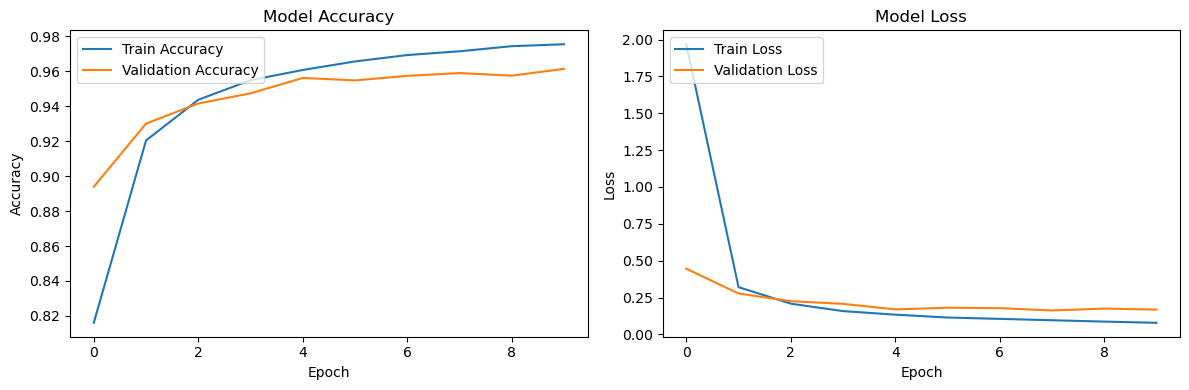

In [33]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [34]:
# Predict labels for the test dataset
predictions = model.predict(x_test)

313/313 [==============================] - 0s 512us/step


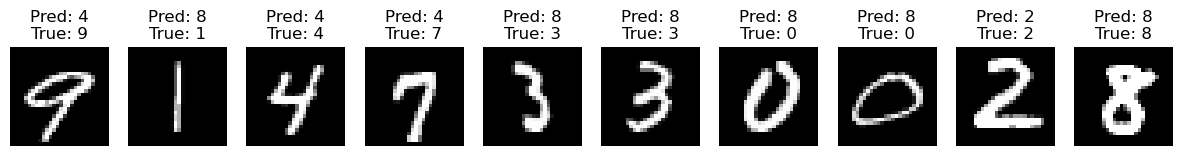

In [35]:
import numpy as np
# Function to plot images with their predicted and actual labels
def plot_random_test_images(X_test, y_test, predictions, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        index = np.random.randint(0, len(X_test))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray', interpolation='none')
        plt.title(f"Pred: {np.argmax(predictions[index])}\nTrue: {np.argmax(y_test[index])}")
        plt.axis('off')
    plt.show()

# Plot random test images with predictions
plot_random_test_images(X_test, y_test, predictions)